In [41]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.utils import to_categorical as to_cat
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

## CONTENTS 
- importance of `batch_size`  wrt to Gradient Descent 


`batch_size =  1` => "SGD" <br />
`batch_size =  32` =>  "mini-batch" <br />
`batch_size =  len(X)` => "batch"

In [42]:
(x_train,y_train),(x_test,y_test) =  mnist.load_data()
x_train = x_train.reshape(x_train.shape[0],28,28) / 255.0
x_test = x_test.reshape(x_test.shape[0],28,28) / 255.0

y_train = to_cat(y_train,10)
y_test =  to_cat(y_test,10)

In [ ]:
def load_model(epochs=10,batch_size=32):
    
    if "model" in (globals()  or locals()):
        del model
    
    model =  Sequential([
        Flatten(input_shape=(28,28)),
        Dense(32,activation="relu"),
        Dense(64,activation="relu"),
        Dense(10,activation="softmax")
    ])
    model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["acc"])
    history =  model.fit(x_train,y_train,epochs=epochs,validation_data=(x_test,y_test),batch_size=batch_size)
    return history

def plot_model(history):
    ## Loss
    plt.style.use("ggplot")
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(["train", "val"],loc='upper left')
    

**Batch GD**

Epoch 1/10


1/1 [==============================] - 2s 2s/step - loss: 2.3156 - acc: 0.1165 - val_loss: 2.2701 - val_acc: 0.1407
Epoch 2/10
1/1 [==============================] - 0s 114ms/step - loss: 2.2726 - acc: 0.1480 - val_loss: 2.2319 - val_acc: 0.1845
Epoch 3/10
1/1 [==============================] - 0s 126ms/step - loss: 2.2349 - acc: 0.1938 - val_loss: 2.1969 - val_acc: 0.2354
Epoch 4/10
1/1 [==============================] - 0s 105ms/step - loss: 2.2007 - acc: 0.2459 - val_loss: 2.1625 - val_acc: 0.2892
Epoch 5/10
1/1 [==============================] - 0s 99ms/step - loss: 2.1671 - acc: 0.2924 - val_loss: 2.1266 - val_acc: 0.3297
Epoch 6/10
1/1 [==============================] - 0s 115ms/step - loss: 2.1322 - acc: 0.3311 - val_loss: 2.0879 - val_acc: 0.3643
Epoch 7/10
1/1 [==============================] - 0s 117ms/step - loss: 2.0946 - acc: 0.3650 - val_loss: 2.0459 - val_acc: 0.3967
Epoch 8/10
1/1 [==============================] - 0s 127ms/step - loss: 2.0540 - acc: 0.3973

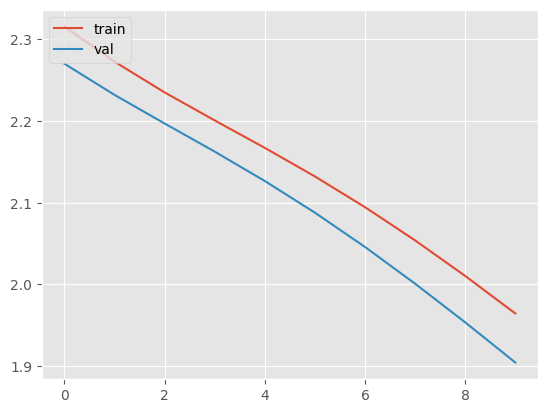

In [45]:
history =  load_model(batch_size=len(x_train))
plot_model(history)

**Mini-Batch GD**

Epoch 1/10
60/60 [==============================] - 1s 6ms/step - loss: 1.2017 - acc: 0.6682 - val_loss: 0.4468 - val_acc: 0.8764
Epoch 2/10
60/60 [==============================] - 0s 5ms/step - loss: 0.3720 - acc: 0.8940 - val_loss: 0.3057 - val_acc: 0.9123
Epoch 3/10
60/60 [==============================] - 0s 5ms/step - loss: 0.2911 - acc: 0.9174 - val_loss: 0.2682 - val_acc: 0.9205
Epoch 4/10
60/60 [==============================] - 0s 5ms/step - loss: 0.2564 - acc: 0.9263 - val_loss: 0.2385 - val_acc: 0.9280
Epoch 5/10
60/60 [==============================] - 0s 5ms/step - loss: 0.2308 - acc: 0.9335 - val_loss: 0.2202 - val_acc: 0.9341
Epoch 6/10
60/60 [==============================] - 0s 5ms/step - loss: 0.2122 - acc: 0.9386 - val_loss: 0.2052 - val_acc: 0.9366
Epoch 7/10
60/60 [==============================] - 0s 5ms/step - loss: 0.1967 - acc: 0.9433 - val_loss: 0.1917 - val_acc: 0.9414
Epoch 8/10
60/60 [==============================] - 0s 5ms/step - loss: 0.1831 - acc: 0.94

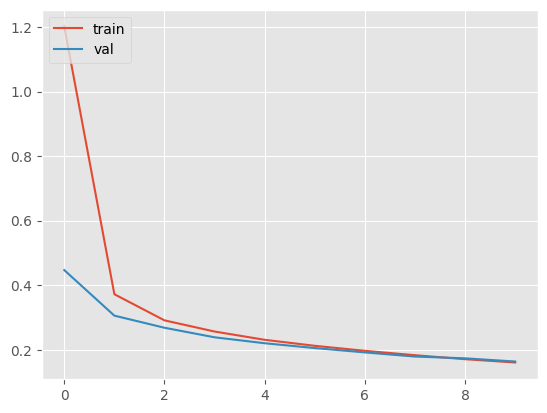

In [46]:
history =  load_model(batch_size=1000)
plot_model(history)

**Stochastic GD**

Epoch 1/2
60000/60000 [==============================] - 114s 2ms/step - loss: 0.2587 - acc: 0.9235 - val_loss: 0.2012 - val_acc: 0.9436
Epoch 2/2
60000/60000 [==============================] - 110s 2ms/step - loss: 0.1665 - acc: 0.9540 - val_loss: 0.1772 - val_acc: 0.9569


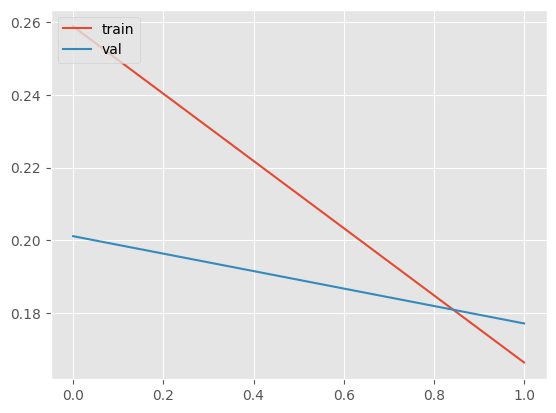

In [48]:
history =  load_model(epochs=2,batch_size=1)
plot_model(history)